### 2.1. Problem Statement: Machine Learning 

#### 1. What are the three stages to build the hypotheses or model in machine learning?


#### Answer: 
a)      Model building
b)      Model testing
c)      Applying the model

#### 2. What is the standard approach to supervised learning?

#### Answer:
The standard approach to supervised learning is to split the set of example into the training set and the test.

#### 3. What is Training set and Test set?

#### Answer: 
In machine learning, a set of data is used to discover the potentially predictive relationship is known as ‘Training Set’. Training set is an examples given to the learner, while Test set is used to validate the accuracy of the hypotheses generated by the learner, and it is the set of example held back from the learner. Training set are distinct from Test set.

#### 4. What is the general principle of an ensemble method and what is bagging and boosting in ensemble method?

#### Answer:
The general principle of an ensemble method is to combine the predictions of several models built with a given learning algorithm in order to improve robustness over a single model.  Bagging is a method in ensemble for improving unstable estimation or classification schemes.  While boosting method are used sequentially to reduce the bias of the combined model.  Boosting and Bagging both can reduce errors by reducing the variance term.

#### 5. How can you avoid overfitting ?

#### Answer:
By using a lot of data overfitting can be avoided, overfitting happens relatively as you have a small dataset, and you try to learn from it.
You can also use a technique known as cross validation in circumstances where you have a small dataset and you are forced to build a model based on that. In this method the dataset splits into two section, testing and training datasets, the testing dataset will only test the model while, in training dataset, the datapoints will come up with the model.
In this technique,  a model is usually given a dataset of a known data on which training (training data set) is run and a dataset of unknown data against which the model is tested. The idea of cross validation is to define a dataset to “test” the model in the training phase.

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### 2.2 Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names);bos.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60


In [7]:
#Transform the data set into a data frame 
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target)

In [8]:
#Initialize the linear regression model
lm = linear_model.LinearRegression()

#Split the data into 70% training and 30% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train our model with the training data
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Print the coefecients for each feature of our model
print(lm.coef_)

[[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]


In [10]:
#print our price predictions on our test data
y_pred = lm.predict(x_test)
print(y_pred)

[[28.64896005]
 [36.49501384]
 [15.4111932 ]
 [25.40321303]
 [18.85527988]
 [23.14668944]
 [17.3921241 ]
 [14.07859899]
 [23.03692679]
 [20.59943345]
 [24.82286159]
 [18.53057049]
 [-6.86543527]
 [21.80172334]
 [19.22571177]
 [26.19191985]
 [20.27733882]
 [ 5.61596432]
 [40.44887974]
 [17.57695918]
 [27.44319095]
 [30.1715964 ]
 [10.94055823]
 [24.02083139]
 [18.07693812]
 [15.934748  ]
 [23.12614028]
 [14.56052142]
 [22.33482544]
 [19.3257627 ]
 [22.16564973]
 [25.19476081]
 [25.31372473]
 [18.51345025]
 [16.6223286 ]
 [17.50268505]
 [30.94992991]
 [20.19201752]
 [23.90440431]
 [24.86975466]
 [13.93767876]
 [31.82504715]
 [42.56978796]
 [17.62323805]
 [27.01963242]
 [17.19006621]
 [13.80594006]
 [26.10356557]
 [20.31516118]
 [30.08649576]
 [21.3124053 ]
 [34.15739602]
 [15.60444981]
 [26.11247588]
 [39.31613646]
 [22.99282065]
 [18.95764781]
 [33.05555669]
 [24.85114223]
 [12.91729352]
 [22.68101452]
 [30.80336295]
 [31.63522027]
 [16.29833689]
 [21.07379993]
 [16.57699669]
 [20.36362

In [11]:
#Print the the prediction for the third row of 
validation_data = y_pred[:5]
validation_labels = y_test[:5]
#print("Predictions:", lm.predict(validation_data))
#print("validation_label:", list(validation_label))

In [12]:
validation_data,validation_labels

(array([[28.64896005],
        [36.49501384],
        [15.4111932 ],
        [25.40321303],
        [18.85527988]]),         0
 173  23.6
 274  32.4
 491  13.6
 72   22.8
 452  16.1)

Text(0.5, 1.0, 'Prices vs Predicted prices')

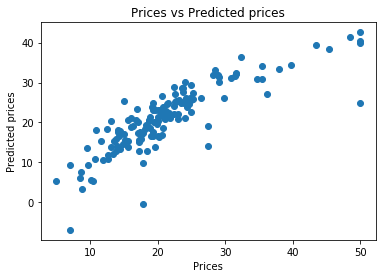

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

In [14]:
# check model performance
print('Mean Absolute Error, MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error, MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error, RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error, MAE: 3.1627098714573783
Mean Squared Error, MSE: 21.517444231176995
Root Mean Squared Error, RMSE: 4.638689926172797


### The model isn’t a really great linear model but can give some accurate predictions.

### 2.3 I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.
### Dataset
##### The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.
##### Description of Variables
##### The dataset contains 6366 observations of 9 variables:
##### rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
##### age: woman's age
##### yrs_married: number of years married
##### children: number of children
##### religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
##### educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20= advanced degree)
##### occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
##### occupation_husb: husband's occupation (same coding as above)
##### affairs: time spent in extra-marital affairs


In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 

In [16]:
# load dataset
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [17]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [18]:
# Records identified where there's no affair 
dta.loc[dta.affairs<=0].sample(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
2590,5.0,37.0,16.5,2.0,1.0,12.0,3.0,5.0,0.0,0
2347,5.0,32.0,2.5,1.0,3.0,12.0,3.0,4.0,0.0,0
5272,3.0,32.0,2.5,1.0,2.0,14.0,3.0,3.0,0.0,0
4419,4.0,42.0,23.0,3.0,3.0,12.0,3.0,4.0,0.0,0


In [19]:
#Add an intercept column as well as dummy variables for occupation and occupation_husb,
#(Treat them as categorial variables)
#Use the dmatrices function from the patsy module

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
print(X.columns)


Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [20]:
# Rename columns of X so that they are easily understandable
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [21]:
#Flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.
y = np.ravel(y)

In [22]:
# instantiate a logistic regression model, and fit with X and y
lr = LogisticRegression()
model = lr.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7258875274897895

In [23]:
# what percentage had affairs?
y.mean()

0.3224945020420987

In [24]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[1.489835891324933]
1,occ_2,[0.18806639024440983]
2,occ_3,[0.4989478668156914]
3,occ_4,[0.25066856498524825]
4,occ_5,[0.8390080648117001]
5,occ_6,[0.8339084337443315]
6,occ_husb_2,[0.1906359445867889]
7,occ_husb_3,[0.2978327129263421]
8,occ_husb_4,[0.1614088540760616]
9,occ_husb_5,[0.18777091388972483]


#####  marriage rating and religion reduce the likelihood of extramarital affairs

In [25]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# predict class labels for the test set
y_pred = LR.predict(X_test)
print (y_pred)

[1. 0. 0. ... 0. 0. 0.]


In [27]:
# generate class probabilities
prob = LR.predict_proba(X_test)
print(prob)

[[0.3514634  0.6485366 ]
 [0.90955084 0.09044916]
 [0.72567333 0.27432667]
 ...
 [0.55727385 0.44272615]
 [0.81207043 0.18792957]
 [0.74734601 0.25265399]]


In [28]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))

0.7298429319371728
0.6339179260634122


#### We can also see the confusion matrix and a classification report with other metrics.

In [29]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[1169  134]
 [ 382  225]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [30]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


In [31]:
#Predicting the Probability of an Affair
#Just for fun, let's predict the probability of an affair for a random woman not present in the dataset.
#She's a 35-year-old professional who graduated from some college, has been married for 9 years, 
# Has 4 child, rates herself as unreligious , rates her marriage as fair, and her husband is a manager

lr.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 5, 35, 4, 2, 2, 17]]))

array([[0.91346609, 0.08653391]])

### 2.4. Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt, pydotplus
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from pylab import rcParams
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import pydotplus,io
import graphviz
from IPython.core.display import Image

In [33]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F33,S


In [34]:
#examine the overall chance of survival for a Titanic passenger
titanic.Survived.mean()

0.3838383838383838

In [35]:
#view composition of each class in the Titanic
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [36]:
#view composition of each class in the Titanic by gender
gender_group =titanic.groupby(['Pclass','Sex']).mean()
gender_group

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

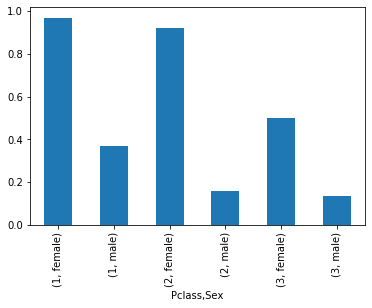

In [37]:
# survival rate by gender
# women were much more likely to survive than the men
gender_group['Survived'].plot(kind = 'bar')

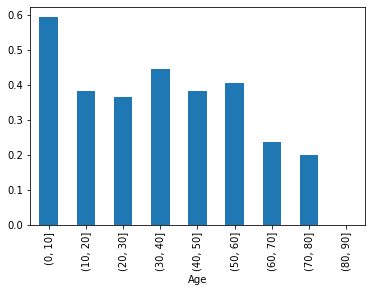

In [38]:
#survival rate by age
#Children were more likely to survive than adults
survival_by_agegroups = pd.cut(titanic["Age"], np.arange(0, 100, 10))
age_groups = titanic.groupby(survival_by_agegroups).mean()
age_groups['Survived'].plot(kind = 'bar')

In [39]:
#find columns with missing data
pd.isnull(titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
# 177 rows are missing the “Age” field
# here we fill the missing values with “median age for each passenger class according to title”.
# then drop all rows with missing value

# create a new feature to extract title names from the Name column
titanic['Title'] = titanic['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [41]:
# normalize the titles
standardized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles 
titanic['Title'] = titanic['Title'].map(standardized_titles)
# view value counts for the normalized titles
print(titanic['Title'].value_counts())

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


In [42]:
# view median Age by  Sex, Pclass, and Title 
medianAge = titanic.groupby(['Sex','Pclass', 'Title'])['Age'].median()
medianAge

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [43]:
#Using the medianAge variable, fill in the missing values for Age
titanic['Age'] = titanic.groupby(['Sex','Pclass', 'Title'])['Age'].apply(lambda x: x.fillna(x.median()))

In [44]:
pd.isnull(titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [45]:
# drop unwanted columns for the analysis
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Title'], axis = 1);titanic.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
dtype: int64

In [46]:
# "Sex" field has string values that correspond to categories (i.e "Male" and "Female")
# Convert these strings into integer keys(Female:0,Male:1), making it easier for the classification algorithms 
#to find patterns.
# #new_df = new_titanic(pd.read_csv(url))
titanic['Sex'] = titanic['Sex'].map({"male": 1, "female":0})
#new_df.reset_index()
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [47]:
# Separate the data set into two arrays: 
# "X" containing all of the values for each row besides "Survived"
# and "y" containing only the “survived” value for that row.

X = titanic.drop(['Survived'], axis=1).values
y = titanic['Survived'].values

In [48]:
#break the "X" and "y" array into two parts each — a training set and a testing set.
# use a 20/80 split, such that 80% of the dataset will be used for training and 20% will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print ("X_test: ", X_test)
print ("y_test: ", y_test)

X_test:  [[  3.       1.      26.       0.       0.      14.4583]
 [  3.       1.      26.       0.       0.       7.55  ]
 [  3.       1.       7.       4.       1.      29.125 ]
 ...
 [  1.       0.      31.       1.       0.     113.275 ]
 [  3.       1.      23.       0.       0.       7.8542]
 [  3.       1.      19.       0.       0.       8.05  ]]
y_test:  [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [49]:
# initialize an instance of an untrained decision tree classifier.
# fit this classifier to our training set
# score it using our test data to determine how accurate it is
dtc = DecisionTreeClassifier(max_depth=10)

In [50]:
#predictors = train.drop(['Survived', 'PassengerId'], axis=1)
#target = train["Survived"]
#x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

dtc.fit (X_train, y_train)

dtc.score (X_test, y_test)*100

80.44692737430168

In [51]:
# accuracy of the model could vary depending on which rows were selected for the training and test sets.
# We will get around this problem by using a shuffle validator.
# shuffle validator applies the same random 20:80 split as before,
# but this time it generates 20 unique permutations of this split.

shuffle_validator = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
#shuffle_validator.get_n_splits(X,y)
def test_classifier(clf):
    scores = cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: {:.4f} (+/-{:.2f})".format(scores.mean(), scores.std()))

In [52]:
test_classifier(dtc)

Accuracy: 0.8056 (+/-0.03)


In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

79.33


In [54]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

79.89


In [55]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Score': [ acc_logreg, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,79.89
0,Logistic Regression,79.33


In [56]:
# train the decision tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [57]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

In [58]:
# how did our model perform
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 35
Accuracy: 0.80


In [59]:
#Plotting the Decision Tree
dot_data = io.StringIO()
graphviz(dtc, out_file=dot_data,feature_names=['age','sex'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(filename='titanic.png')

TypeError: 'module' object is not callable

### 2.5 In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set. Following the code to get data into the environment:

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

In [61]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [62]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [63]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=5)
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [65]:
#check if we can reduce the dimensionality of the problem using Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cpts = pd.DataFrame(pca.transform(X_train))
x_axis = np.arange(1, pca.n_components_+1)
pca_scaled = PCA()
pca_scaled.fit(X_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(X_train_scaled))

In [66]:
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=True, random_state=1, verbose=0,
                      warm_start=False)

In [67]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle = True, random_state=12)

In [68]:
X, y = boston.data, boston.target
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
RF_rg = RandomForestRegressor (n_estimators=500,random_state=1)
crossvalidation = KFold(n_splits=10, shuffle=True,random_state=1)
score = np.mean(cross_val_score(RF_rg, X, y,scoring='neg_mean_squared_error', cv=crossvalidation))
print('Mean squared error: {:.2f}' .format(abs(score)))

Mean squared error: 11.66


#### we have found a well-fitting model to predict the price value of a house

### 2.6 In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:
#### Data Set Information:
#### Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions:
#### ((AAGE>16) && (AGI>100) &&
#### (AFNLWGT>1)&& (HRSWK>0))
#### Attribute Information:
#### Listing of attributes: >50K, <=50K.
#### age: continuous.
#### workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
#### fnlwgt: continuous.
#### education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
#### Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
#### education-num: continuous.
#### marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
#### occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
#### relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#### race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#### sex: Female, Male.
#### capital-gain: continuous.
#### capital-loss: continuous.
#### hours-per-week: continuous.
#### native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
#### Following is the code to load required libraries and data:

In [69]:
import numpy as np
import pandas as pd

In [70]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep= ',', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , sep = ',', skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', \
              'education_num', 'marital_status', 'occupation',\
              'relationship', 'race', 'sex', 'capital_gain', \
              'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [71]:
train_set.sample(1), test_set.sample(1)

(       age workclass  fnlwgt      education  education_num  \
 24030   47   Private  216096   Some-college             10   
 
                marital_status        occupation relationship    race      sex  \
 24030   Married-spouse-absent   Exec-managerial    Unmarried   White   Female   
 
        capital_gain  capital_loss  hours_per_week native_country wage_class  
 24030             0             0              35    Puerto-Rico      <=50K  ,
       age workclass  fnlwgt education  education_num  marital_status  \
 3530   19   Private  311974   HS-grad              9   Never-married   
 
               occupation relationship    race    sex  capital_gain  \
 3530   Machine-op-inspct    Own-child   White   Male             0   
 
       capital_loss  hours_per_week native_country wage_class  
 3530             0              40         Mexico     <=50K.  )

In [72]:
train_set.shape

(32561, 15)

In [73]:
import pandas_profiling
pandas_profiling.ProfileReport(train_set)

Number of variables,15
Number of observations,32561
Total Missing (%),0.0%
Total size in memory,3.7 MiB
Average record size in memory,120.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [74]:
pandas_profiling.ProfileReport(test_set)

Number of variables,15
Number of observations,16281
Total Missing (%),0.0%
Total size in memory,1.9 MiB
Average record size in memory,120.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [75]:
for i in train_set.columns:
    if train_set[i].dtype == object:
        print(i, train_set[i].str.contains(' \?').sum())

print ('\n',"*" * 10,'\n')
        
for i in test_set.columns:
    if test_set[i].dtype == object:
        print(i, test_set[i].str.contains(' \?').sum())

workclass 1836
education 0
marital_status 0
occupation 1843
relationship 0
race 0
sex 0
native_country 583
wage_class 0

 ********** 

workclass 963
education 0
marital_status 0
occupation 966
relationship 0
race 0
sex 0
native_country 274
wage_class 0


In [76]:
train = train_set.replace(' ?', np.nan).dropna()
test = test_set.replace(' ?', np.nan).dropna()

In [77]:
print(train.shape)
print('\n', test.shape)

(30162, 15)

 (15060, 15)


In [78]:
# Required out come is that wages_class be <=50K 0r >50K
print(train.wage_class.unique()), print('\n', test.wage_class.unique())

[' <=50K' ' >50K']

 [' <=50K.' ' >50K.']


(None, None)

In [79]:
#combine the datasets into one
df = pd.concat([train, test], axis = 0);df.shape

(45222, 15)

In [80]:
# Check datatypes

pd.DataFrame(df.dtypes)

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [81]:
for i in df.columns:
    if df[i].dtype == object:
        df[i] = df[i].astype('category')
pd.DataFrame(df.dtypes)

,0
age,int64
workclass,category
fnlwgt,int64
education,category
education_num,int64
marital_status,category
occupation,category
relationship,category
race,category
sex,category


In [82]:
#split these back into their original train/test sizes
train_1 = df[:train.shape[0]] 
test_1 = df[train.shape[0]:] 

In [83]:
train_1.shape, test_1.shape

((30162, 15), (15060, 15))

In [84]:
y_train = train_1.pop('wage_class')
y_test = test_1.pop('wage_class')

In [85]:
import xgboost as xgb
params = {"objective":'binary:logistic','colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

ModuleNotFoundError: No module named 'xgboost'